In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

from numpy.random import seed
from numpy.random import randn
from numpy import percentile

Healthcare Dataset Challenge: The task is to analyze the clinical and financial data of patients hospitalized for a certain condition. It is attached with this email. Some variable names and patient_id's have been anonymized in this dataset. You are required to join the data given in different tables, and find insights about the <b>drivers of cost of care</b>.

## Importing Datasets

In [2]:
ba_df = pd.read_csv('bill_amount.csv')
bid_df = pd.read_csv('bill_id.csv')
cd_df = pd.read_csv('clinical_data.csv')
demo_df = pd.read_csv('demographics.csv')

# 1. Data Cleaning

## 1a. Overall dataset assesssment

In [3]:
#checking dtypes and non-null rows
ba_df.info()
print('\n')
bid_df.info()
print('\n')
cd_df.info()
print('\n')
demo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bill_id  13600 non-null  int64  
 1   amount   13600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bill_id            13600 non-null  int64 
 1   patient_id         13600 non-null  object
 2   date_of_admission  13600 non-null  object
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3400 non-null   object 
 1   date_of_admission   3400 non-n

## 1b. Bill Amounts

In [4]:
#check for null values
ba_df_null = ba_df.isnull().sum().reset_index()
ba_df_null[ba_df_null[0]>0]

,index,0


In [5]:
ba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bill_id  13600 non-null  int64  
 1   amount   13600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [6]:
ba_df[ba_df['bill_id'] == 0]

,bill_id,amount


In [7]:
ba_df[np.isclose(ba_df['amount'], 0.0)]

,bill_id,amount


In [8]:
#checking for negative bill amounts
ba_df[ba_df['amount'] < 0]

,bill_id,amount


## 1c. Bill ID

In [17]:
#check for null values
bid_df_null = bid_df.isnull().sum().reset_index()
bid_df_null[bid_df_null[0]>0]

,index,0


In [18]:
bid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bill_id            13600 non-null  int64 
 1   patient_id         13600 non-null  object
 2   date_of_admission  13600 non-null  object
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


In [19]:
bid_df[bid_df['bill_id'] == 0]

,bill_id,patient_id,date_of_admission


In [20]:
bid_df.sort_values('date_of_admission')

,bill_id,patient_id,date_of_admission
0,7968360812,1d21f2be18683991eb93d182d6b2d220,2011-01-01
1,6180579974,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
2,7512568183,1d21f2be18683991eb93d182d6b2d220,2011-01-01
3,3762633379,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01
4,7654730355,1d21f2be18683991eb93d182d6b2d220,2011-01-01
...,...,...,...
13589,6033582275,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28
13588,7092335187,ac52a32f8ce8c46d82df2d72052ae5a9,2015-12-28
13598,9243628699,a4c61deaa9ce86b4d2289eab6128b872,2015-12-28
13592,498923109,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28


In [21]:
from datetime import date
f_date = date(2011, 1, 1)
l_date = date(2015, 12, 28)
delta = l_date - f_date
print(delta.days)

1822


In [22]:
len(bid_df['date_of_admission'].value_counts())

1450

#### Timespan of admission date: 2011-01-01 to 2015-12-28
    5 years
    1822 days
    
    1450 unique dates

## 1d. Clinical Data

In [23]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   date_of_discharge   3400 non-null   object 
 3   medical_history_1   3400 non-null   int64  
 4   medical_history_2   3167 non-null   float64
 5   medical_history_3   3400 non-null   object 
 6   medical_history_4   3400 non-null   int64  
 7   medical_history_5   3096 non-null   float64
 8   medical_history_6   3400 non-null   int64  
 9   medical_history_7   3400 non-null   int64  
 10  preop_medication_1  3400 non-null   int64  
 11  preop_medication_2  3400 non-null   int64  
 12  preop_medication_3  3400 non-null   int64  
 13  preop_medication_4  3400 non-null   int64  
 14  preop_medication_5  3400 non-null   int64  
 15  preop_medication_6  3400 non-null   int64  
 16  sympto

In [24]:
#check for null values
cd_df_null = cd_df.isnull().sum().reset_index()
cd_df_null[cd_df_null[0]>0]

,index,0
4,medical_history_2,233
7,medical_history_5,304


### Checking if the 'id' column in clinical_data is the 'patient_id' column

In [25]:
len(cd_df['id'].value_counts())
# 3000 unique patients detected

3000

#### Note: 3000 unique patients detected which is identical to the number of unique patients in patient_id columns in demographic data, therefore assume 'id' column represents 'patient_id'

In [26]:
cd_df = cd_df.rename(columns={"id": "patient_id"})

### Admission and Discharge dates

In [27]:
len(cd_df['date_of_admission'].value_counts())


1450

#### Note: 1450 unique dates, similar to Bill ID dataset.

In [28]:
len(cd_df['date_of_discharge'].value_counts())

1532

In [29]:
cd_df['date_of_discharge'].sort_values()

0       2011-01-11
1       2011-01-11
2       2011-01-13
3       2011-01-14
4       2011-01-16
           ...    
3396    2016-01-07
3395    2016-01-07
3397    2016-01-08
3398    2016-01-09
3399    2016-01-11
Name: date_of_discharge, Length: 3400, dtype: object

In [30]:
from datetime import date
f_date = date(2011, 1, 11)
l_date = date(2016, 1, 11)
delta = l_date - f_date
print(delta.days)

1826


#### Timespan of discharge date: 2011-01-11 to 2016-01-11
    5 years
    1826 days
    
    1532 unique dates

### Assessing medical_history categorizations

In [31]:
med_hist_df = cd_df[['medical_history_1', 'medical_history_2', 'medical_history_3', 
       'medical_history_4', 'medical_history_5', 'medical_history_6',
      'medical_history_7']]

In [32]:
med_hist_df_values = pd.DataFrame({'Medical History':[i for i in med_hist_df.columns], 'Unique Values':[ med_hist_df[i].unique() for i in med_hist_df.columns]})
med_hist_df_values

,Medical History,Unique Values
0,medical_history_1,"[0, 1]"
1,medical_history_2,"[1.0, 0.0, nan]"
2,medical_history_3,"[0, No, 1, Yes]"
3,medical_history_4,"[0, 1]"
4,medical_history_5,"[0.0, nan, 1.0]"
5,medical_history_6,"[0, 1]"
6,medical_history_7,"[0, 1]"


#### Note: Categorizations need to be standardized to 1 for present and 0 for absent.

### Transforming medical_history_2

In [33]:
cd_df['medical_history_2'].value_counts()

0.0    2181
1.0     986
Name: medical_history_2, dtype: int64

In [34]:
null_values = [np.nan, 0.0, 0, 'No']
cd_df['medical_history_2'] = cd_df['medical_history_2'].apply(lambda x:1 if x>=1 else 0)
cd_df['medical_history_2'].value_counts()

0    2414
1     986
Name: medical_history_2, dtype: int64

### Transforming medical_history_5

In [35]:
cd_df['medical_history_5'].value_counts()

0.0    2898
1.0     198
Name: medical_history_5, dtype: int64

In [36]:
cd_df['medical_history_5'] = cd_df['medical_history_5'].apply(lambda x:1 if x>=1 else 0)
cd_df['medical_history_5'].value_counts()

0    3202
1     198
Name: medical_history_5, dtype: int64

### Transforming medical_history_3

In [37]:
cd_df['medical_history_3'].value_counts()

0      2176
No      761
1       348
Yes     115
Name: medical_history_3, dtype: int64

In [38]:
null_values = [np.nan, 0.0, 0, 'No', '0', '0.0']
cd_df['medical_history_3'] = cd_df['medical_history_3'].apply(lambda x:0 if x in null_values else 1)
cd_df['medical_history_3'].value_counts()

0    2937
1     463
Name: medical_history_3, dtype: int64

In [39]:
med_hist_df = cd_df[['medical_history_1', 'medical_history_2', 'medical_history_3', 
       'medical_history_4', 'medical_history_5', 'medical_history_6',
      'medical_history_7']]
med_hist_df_values = pd.DataFrame({'Medical History':[i for i in med_hist_df.columns], 'Unique Values':[ med_hist_df[i].unique() for i in med_hist_df.columns]})
med_hist_df_values

,Medical History,Unique Values
0,medical_history_1,"[0, 1]"
1,medical_history_2,"[1, 0]"
2,medical_history_3,"[0, 1]"
3,medical_history_4,"[0, 1]"
4,medical_history_5,"[0, 1]"
5,medical_history_6,"[0, 1]"
6,medical_history_7,"[0, 1]"


In [40]:
med_hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   medical_history_1  3400 non-null   int64
 1   medical_history_2  3400 non-null   int64
 2   medical_history_3  3400 non-null   int64
 3   medical_history_4  3400 non-null   int64
 4   medical_history_5  3400 non-null   int64
 5   medical_history_6  3400 non-null   int64
 6   medical_history_7  3400 non-null   int64
dtypes: int64(7)
memory usage: 186.1 KB


#### Note: Medical History Categorizations standardized into 1 for present, 0 for absent (integer format)

### Pre-op Medication Categorizations

In [41]:
pom_df = cd_df[['preop_medication_1', 'preop_medication_2', 'preop_medication_3',
               'preop_medication_4', 'preop_medication_5', 'preop_medication_6']]
pom_df_values = pd.DataFrame({'Pre-Op Medication':[i for i in pom_df.columns], 'Unique Values':[ pom_df[i].unique() for i in pom_df.columns]})
pom_df_values

,Pre-Op Medication,Unique Values
0,preop_medication_1,"[1, 0]"
1,preop_medication_2,"[0, 1]"
2,preop_medication_3,"[1, 0]"
3,preop_medication_4,"[0, 1]"
4,preop_medication_5,"[0, 1]"
5,preop_medication_6,"[1, 0]"


### Symptom categorizations

In [42]:
symptoms_df = cd_df[['symptom_1', 'symptom_2', 'symptom_3', 
       'symptom_4', 'symptom_5']]
symptoms_df_values = pd.DataFrame({'Symptoms':[i for i in symptoms_df.columns], 'Unique Values':[ symptoms_df[i].unique() for i in symptoms_df.columns]})
symptoms_df_values

,Symptoms,Unique Values
0,symptom_1,"[0, 1]"
1,symptom_2,"[0, 1]"
2,symptom_3,"[0, 1]"
3,symptom_4,"[1, 0]"
4,symptom_5,"[1, 0]"


### Lab Results - check null, outliers

In [43]:
lab_df = cd_df[['lab_result_1', 'lab_result_2', 'lab_result_3']]
lab_df_values = pd.DataFrame({'Lab Result':[i for i in lab_df.columns], 'Unique Values':[ lab_df[i].unique() for i in lab_df.columns]})
lab_df_values

,Lab Result,Unique Values
0,lab_result_1,"[13.2, 13.8, 11.2, 13.3, 12.0, 15.8, 12.1, 16...."
1,lab_result_2,"[30.9, 22.6, 26.2, 28.4, 27.8, 31.0, 23.0, 26...."
2,lab_result_3,"[123.0, 89.0, 100.0, 76.0, 87.0, 75.0, 83.0, 1..."


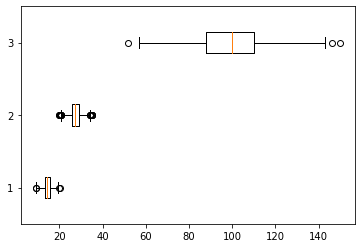

In [44]:
plt.boxplot(lab_df, vert = False);

### Weight/Height - check null, outliers

In [45]:
wh_df = cd_df[['weight', 'height']]

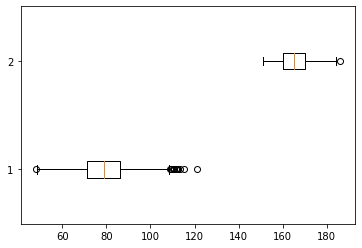

In [46]:
plt.boxplot(wh_df, vert = False);

## Recheck for null values

In [47]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   date_of_discharge   3400 non-null   object 
 3   medical_history_1   3400 non-null   int64  
 4   medical_history_2   3400 non-null   int64  
 5   medical_history_3   3400 non-null   int64  
 6   medical_history_4   3400 non-null   int64  
 7   medical_history_5   3400 non-null   int64  
 8   medical_history_6   3400 non-null   int64  
 9   medical_history_7   3400 non-null   int64  
 10  preop_medication_1  3400 non-null   int64  
 11  preop_medication_2  3400 non-null   int64  
 12  preop_medication_3  3400 non-null   int64  
 13  preop_medication_4  3400 non-null   int64  
 14  preop_medication_5  3400 non-null   int64  
 15  preop_medication_6  3400 non-null   int64  
 16  sympto

In [48]:
cd_df_null = cd_df.isnull().sum().reset_index()
cd_df_null[cd_df_null[0]>0]

,index,0


## 1e. Demographic Data

In [49]:
demo_df

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,Female,Indian,Singaporean,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,f,Chinese,Singapore citizen,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,Male,Chinese,Singapore citizen,1982-07-03
3,c7f3881684045e6c49020481020fae36,Male,Malay,Singapore citizen,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,m,Chinese,Singaporean,1970-12-12
...,...,...,...,...,...
2995,0ba769860b060834b8c728ad26137c7f,Female,Malay,PR,1948-01-02
2996,a27a55b92a7afd9cfc427085a2734385,Female,Malay,Singaporean,1942-03-08
2997,c17a0f4c4f3931bed36081fabf501396,Male,Indian,Singaporean,1964-01-02
2998,c5ca8e8bfd744a1ef6f77318bcb591b4,Female,Chinese,Singaporean,1973-04-19


In [50]:
demo_subset = demo_df[['gender', 'race', 'resident_status']]
demo_df_values = pd.DataFrame({'Symptoms':[i for i in demo_subset.columns], 'Unique Values':[ demo_subset[i].unique() for i in demo_subset.columns]})
demo_df_values

,Symptoms,Unique Values
0,gender,"[Female, f, Male, m]"
1,race,"[Indian, Chinese, Malay, chinese, India, Others]"
2,resident_status,"[Singaporean, Singapore citizen, PR, Foreigner]"


#### Gender

Casting gender data to integer type

Male: 0

Female: 1

In [51]:
demo_subset['gender'].value_counts()

Female    1396
Male      1333
m          170
f          101
Name: gender, dtype: int64

In [52]:
male = ['Male', 'm']
demo_df['gender'] = demo_subset['gender'].apply(lambda x:1 if x in male else 0)
demo_df['gender'].value_counts()

1    1503
0    1497
Name: gender, dtype: int64

#### Race

Casting race data to integer type

Chinese: 0

Malay: 1

Indian: 2

Others: 3

In [53]:
demo_subset['race'].value_counts()

Chinese    1608
Malay       629
chinese     307
Indian      195
Others      161
India       100
Name: race, dtype: int64

In [54]:
demo_df['race'] = demo_subset['race'].replace(regex={r'.hine.': 0, '.ala.': 1, '.ndi.': 2, '.ther.': 3})
demo_df['race'].value_counts()

0    1915
1     629
2     295
3     161
Name: race, dtype: int64

#### Resident Status

Casting resident status data to integer type

Singaporean: 0

PR: 1

Foreigner: 2


In [55]:
demo_subset['resident_status'].value_counts()

Singaporean          1782
Singapore citizen     610
PR                    465
Foreigner             143
Name: resident_status, dtype: int64

In [56]:
demo_df['resident_status'] = demo_subset['resident_status'].replace(regex={r'.ingapore': 0, 'PR': 1, 'Foreigner': 2})
demo_df['resident_status'].value_counts()

0    2392
1     465
2     143
Name: resident_status, dtype: int64

In [57]:
demo_df

,patient_id,gender,race,resident_status,date_of_birth
0,fa2d818b2261e44e30628ad1ac9cc72c,0,2,0,1971-05-14
1,5b6477c5de78d0b138e3b0c18e21d0ae,0,0,0,1976-02-18
2,320aa16c61937447fd6631bf635e7fde,1,0,0,1982-07-03
3,c7f3881684045e6c49020481020fae36,1,1,0,1947-06-15
4,541ad077cb4a0e64cc422673afe28aef,1,0,0,1970-12-12
...,...,...,...,...,...
2995,0ba769860b060834b8c728ad26137c7f,0,1,1,1948-01-02
2996,a27a55b92a7afd9cfc427085a2734385,0,1,0,1942-03-08
2997,c17a0f4c4f3931bed36081fabf501396,1,2,0,1964-01-02
2998,c5ca8e8bfd744a1ef6f77318bcb591b4,0,0,0,1973-04-19


In [58]:
demo_subset = demo_df[['gender', 'race', 'resident_status']]
demo_df_values = pd.DataFrame({'Symptoms':[i for i in demo_subset.columns], 'Unique Values':[ demo_subset[i].unique() for i in demo_subset.columns]})
demo_df_values

,Symptoms,Unique Values
0,gender,"[0, 1]"
1,race,"[2, 0, 1, 3]"
2,resident_status,"[0, 1, 2]"


# 2. Merging Datasets

Merging datasets

1. Merge bill_amount (ba_df) with bill_id (bid_df) on bill_id to get bill_df
2. Merge bill_df with clinical_data (cd_df) on patient_id to get clin_bill_df
3. Merge clin_bill_df with demo_df on patient_id to get df



In [59]:
print(ba_df.shape)
print(bid_df.shape)
print(cd_df.shape)
print(demo_df.shape)

(13600, 2)
(13600, 3)
(3400, 26)
(3000, 5)


In [60]:
bill_df = ba_df.merge(bid_df, how = 'inner', on = 'bill_id')

In [61]:
bill_df.shape

(13600, 4)

In [62]:
clin_bill_df = pd.merge(bill_df, cd_df,  how='left', left_on=['patient_id','date_of_admission'], right_on = ['patient_id','date_of_admission'])



#### joining on not only on 'patient_id' column but also 'date_of_admission' column to preserve differing clinical data presented by the same patient across multiple visits

In [63]:
clin_bill_df.shape

(13600, 28)

In [64]:
df = clin_bill_df.merge(demo_df, how = 'inner', on = 'patient_id')

In [65]:
df.shape

(13600, 32)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bill_id             13600 non-null  int64  
 1   amount              13600 non-null  float64
 2   patient_id          13600 non-null  object 
 3   date_of_admission   13600 non-null  object 
 4   date_of_discharge   13600 non-null  object 
 5   medical_history_1   13600 non-null  int64  
 6   medical_history_2   13600 non-null  int64  
 7   medical_history_3   13600 non-null  int64  
 8   medical_history_4   13600 non-null  int64  
 9   medical_history_5   13600 non-null  int64  
 10  medical_history_6   13600 non-null  int64  
 11  medical_history_7   13600 non-null  int64  
 12  preop_medication_1  13600 non-null  int64  
 13  preop_medication_2  13600 non-null  int64  
 14  preop_medication_3  13600 non-null  int64  
 15  preop_medication_4  13600 non-null  int64  
 16  preo

In [67]:
df

,bill_id,amount,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0,0,0,0,...,1,17.6,31.8,98.0,65.1,166.0,0,1,0,1967-05-15
1,7040712549,27923.446312,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0,0,0,0,...,1,17.6,31.8,98.0,65.1,166.0,0,1,0,1967-05-15
2,1314727123,1952.978141,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0,0,0,0,...,1,17.6,31.8,98.0,65.1,166.0,0,1,0,1967-05-15
3,1029762870,1244.994422,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,2012-11-03,0,0,0,0,0,...,1,17.6,31.8,98.0,65.1,166.0,0,1,0,1967-05-15
4,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,2014-10-11,0,0,0,0,0,...,0,16.3,29.1,94.0,72.5,162.0,0,0,0,1973-05-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13595,1123494323,663.585265,7373cb1310011241d432d36b25c5bca6,2011-09-17,2011-09-27,0,0,0,0,0,...,1,15.5,29.5,113.0,75.5,182.0,1,0,0,1973-09-14
13596,8843072066,1324.691516,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1,0,0,0,...,1,12.1,29.4,115.0,77.8,175.0,1,1,0,1972-01-04
13597,2727258154,18386.672482,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1,0,0,0,...,1,12.1,29.4,115.0,77.8,175.0,1,1,0,1972-01-04
13598,38401965,5280.005320,c607942a9bebf9c61daf2c0da499ddf5,2013-09-16,2013-09-30,0,1,0,0,0,...,1,12.1,29.4,115.0,77.8,175.0,1,1,0,1972-01-04


In [68]:
df.to_csv('challenge_data_treated.csv', index = False)